### seq2seq 문제점
이전 Post **<a href="https://wjddyd66.github.io/dl/2019/09/15/seq2seq.html">seq2seq</a>**에서는 두가지의 방법으로 인하여 개선된 seq2seq Model을 만들 수 있었다.
1. Input Data의 반전
2. Peeky

<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/105.PNG" height="250" width="600" /></div>


위의  **개선된 seq2seq Model**을 보게 되면 한계점이 존재한다.  
**Context Vector의 크기가 항상 고정**된다는 문제점이다.  
즉 예를 들어 아래 두 문장이 Input Data로서 들어간다고 생각해보자.  
1. 나는 고양이다.
2. 아무튼 어두컴컴하고 축축한 데서 야옹야옹 울고 있었던 것만은 분명히 기억한다.

위의 두문장 같은 경우 Input Data의 길이가 다근데에도 불고하고 Decoder의 Input으로 들어가는 Context의 Vector의 크기는 항상 고정된다는 것을 알 수 있다.  
이러한 문제점으로 인하여 필요한 정보가 Context Vector에 담기지 못하는 문제점이 있다는 것을 알 수 있다.  

### Attention
위의 문제점으로 인하여 나온 기법이 Attention기법이다.  
**Attention 기법이란 독일어 “Ich mochte ein bier”를 영어 “I’d like a beer”로 번역하는 S2S 모델을 만든다고 칩시다. 모델이 네번째 단어인 ‘beer’를 예측할 때 ‘bier’에 주목하게 만들고자 합니다. 어텐션 매커니즘의 가정은 인코더가 ‘bier’를 받아서 벡터로 만든 결과(인코더 출력)는 디코더가 ‘beer’를 예측할 때 쓰는 벡터(디코더 입력)와 유사할 것이라는 점입니다.**  

**즉 Context Vector의 길이와 정보를 다양하게 하여서 필요한 정보를 Decoder에게 전달하고자 하는 것이 Attention 기법의 핵심**이다. (이전 Post의 Peeky와 같은 이유)  

이러한 Attention의 Model은 아래 그림과 같다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/109.PNG" height="250" width="600" /></div>
<br>

위의 Attention Model의 과정을 살펴보게 되면 **Context Vector에 각각의 Encoder의 Output이 들어가게 되서 고정된 Context Vecotr길이의 문제점을 해결**한 것을 알 수 있다.  
Attention을 구성하기 위하여 크게 2부분 Encoder와 Decoder로 나누어서 어떻게 구성해야 하는지 알아보자.  


### Attention 구성

#### Encoder
**Encoder의 가장 큰 목적은 Context Vector가 최종적인 LSTM의 결과로서 고정된 길이가 아닌 모든 LSTM의 결과를 합쳐서 Context Vector를 전달**하자는 것 이다.  
Encoder Model은 아래와 같다.  

<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/110.PNG" height="250" width="600" /></div>
<br>

위의 Attention Encoder의 그림 살펴보게 되면 **Context Vector에 각각의 LSTM의 Output이 들어가게 되서 고정된 Context Vecotr길이의 문제점을 해결**한 것을 알 수 있다.  



**참고사항**  
현재 Attention Encoder는 Attention의 Model과 다르게 LSTM을 사용하고 한뱡향인 것을 알 수 있다. 이러한 구성의 문제점은 x_3는 CBOW(Windor Size: 1)처럼 x_2와 x_4의 내용을 가지고 있지 않고 x_1, x_2처럼 자기 앞에 있는 내용만을 가지고 있는것을 확인할 수 있다. 이러한 문제점 해결방향으로서 양방향으로서 LSTM을 구성하는 것이 있다.  
<br>

#### Decoder
Decoder의 경우 먼저 **Alignment**라는 것을 알아야 한다.  
Alignment는 Attention의 예시와 매우 밀접한 관계가 있다.  
위에서 언급한 예제인 ‘beer’를 예측할 때 ‘bier’에 주목하게 만드는 것이 Attention의 핵심 아이디어라고 소개하였다.  
이렇듯 특정 단어의 대응관계를 나타내는 정보를 **Alignment**라고 한다.  
이전에는 수작업으로서 이우워졌던 대응관계를 Attention Model을 통하여 자동으로 하는 것을 목표로 한다.  

Decoder의 과정은 아래 그림과 같다.  
<div><img src="https://wikidocs.net/images/page/22893/dotproductattention1_final.PNG" height="250" width="600" /></div>
<br>

위의 과정에서 살펴보면 **Encoder를 통하여 가변의 길이를 가진 Context Vector에서 Alignment에 맞는 단어를 추출하여 어떤 계산을 하는 것**이 핵심이다.  

예를들어 다음과 같은 Input 과 Output으로서 Model을 Trainning한다고 생각해보자.  
- input: I am a student
- output: je suis

위와 같은 경우 Context Vector에는 I am a cat라는 정보가 담겨있을 것 이다.  
**Decoder에서는 Context Vector에서의 Decoder의 Input 정보를 통하여 어떠한 Context Vector안의 요소를 선택하는 것인지를 알아내는 것이 핵심**이다.  

**1) Attention Score**  
<div><img src="https://wikidocs.net/images/page/22893/dotproductattention2.PNG" height="250" width="600" /></div>
<br>
위의 그림을 살펴보게 되면 Encoder는 time-step을 1,2,3,4를 가지고 있다.  
이에 따른 Context Vector를 <span>$h$</span>라고 하면 <span>$h$</span>는 Encoder의 각각의 시점의 결과인 <span>$h_1, h_2, h_3, h_4$</span>의 합으로 이루워져 있다.  

최종적인 Decoder의 출력을 <span>$s_t$</span>라고 정의하면 
- seq2seq: <span>$s_t = f(s_{t - 1},y_{t-1})$</span>
- attention: <span>$s_t = f(s_{t - 1},y_{t-1},a_t)$</span>

**즉 Attention기법은 어떠한 단어에 좀 더 가중치(Attention Value: <span>$a_t$</span>)를 많이 두어서 선택할지에 대한 값**이 들어가게 된다.  

기존 seq2seq에서 **Attention Value(<span>$a_t$</span>)**를 구할 수 있으면 Attention기법을 적용시킬 수 있다.  
<span>$a_t$</span>를 구하기 위해서 먼저 **AttentionScore**에 알아보면 다음과 같다.  
**AttentionScore**란 현재 시점 t에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태 각각이 디코더의 바로 전 시점의 은닉 상태 <span>$s_{t-1}$</span>)과 얼마나 유사한지를 판단하는 스코어 값 이다.  

**Attention Score**의 식은 아래와 같다.  
<p>$score(s_{t-1},h_i)$</p> 
위의 식에서 <span>$score$</span>는 두 Vector간에 유사도를 뽑아낼 수 있는 함수로서 사용된다.  

**Attention의 Model이 위에서 설명한 Dot-Product Attention**인 경우는 **AttentionScore**의 식은 아래와 같다.  
<p>$score(s_{t-1},h_i) = s^{T}_{t-1}h_i$</p>


이러한 **AttentionScore의 모음을 <span>$e^t$</span>** 로서 표현하고 식은 아래와 같다.  
<p>$e^t = [s^T_{t-1}h1, ... , s^T_{t-1}h_N]$</p>

**참고 사항(Attention Score score 함수)**  
score함수는 두 Vector간에 유사도를 뽑을 수 있는 함수로서 사용된다고 하였다.  
이에 관한 함수의 종류는 아래 그림과 같다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/111.PNG" height="250" width="600" /></div>
<br>

**2) Attention Distribution**  
<div><img src="https://wikidocs.net/images/page/22893/dotproductattention3_final.PNG" height="250" width="600" /></div>
<br>

**AttentionScore의 모음인 <span>$e^t$</span>에 Softmax를 적용하여  모든값의 합이 1인 분포를 얻어낸다.**  
위와 같은 과정을 거친 분포를 **Attention Distribution(<span>$\alpha^t$ </span>)**이라 하며 **Attention Distribution의 각 원소(<span>$\alpha^t_{i}$ </span>)를 Attention Weight**라고 한다.  
<p>$\alpha^t = softmax(e^t)$</p>

위의 **Attention Score 와 Attention Distribution의 과정**은 아래와 같이 나타낼 수 있다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/115.PNG" height="250" width="600" /></div>
<br>

In [1]:
import numpy as np
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


N, T, H =10, 4, 4
hs = np.random.randn(N, T, H)
h = np.random.randn(N, H)
hr = h.reshape(N, 1, H).repeat(H, axis = 1)

t = hs * hr

s = np.sum(t, axis = 2)
print(s.shape)

a = softmax(s)
print(a.shape)
print('-'*10)
print(a)

(10, 4)
(10, 4)
----------
[[0.40323646 0.45079212 0.04368442 0.10228701]
 [0.03910767 0.0180941  0.91627071 0.02652752]
 [0.32415781 0.26298705 0.29955367 0.11330146]
 [0.21182844 0.3976546  0.12364189 0.26687508]
 [0.00757326 0.91405282 0.0021296  0.07624432]
 [0.29019881 0.17967669 0.05365742 0.47646708]
 [0.37702448 0.49377438 0.00618835 0.12301279]
 [0.90873777 0.01022112 0.01235663 0.06868449]
 [0.18611321 0.00168698 0.73495956 0.07724025]
 [0.38758337 0.04986561 0.55314656 0.00940446]]


위와 같은 Code를 이용하여 **1) Attention Score + 2) Attention Distribution**을 **AttentionWeight이라 하고** 다음과 같이 forward와 backward를 계산할 수 있다.  

In [2]:
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *  # import numpy as np
from common.layers import Softmax

class AttentionWeight:
    def __init__(self):
        self.params, self.grads = [], []
        self.softmax = Softmax()
        self.cache = None

    def forward(self, hs, h):
        N, T, H = hs.shape

        hr = h.reshape(N, 1, H)#.repeat(T, axis=1)
        t = hs * hr
        s = np.sum(t, axis=2)
        a = self.softmax.forward(s)

        self.cache = (hs, hr)
        return a

    def backward(self, da):
        hs, hr = self.cache
        N, T, H = hs.shape

        ds = self.softmax.backward(da)
        dt = ds.reshape(N, T, 1).repeat(H, axis=2)
        dhs = dt * hr
        dhr = dt * hs
        dh = np.sum(dhr, axis=1)

        return dhs, dh

**3) Attention Value**  
<div><img src="https://wikidocs.net/images/page/22893/dotproductattention4_final.PNG" height="250" width="600" /></div>
<br>

**AttentionWeight(<span>$\alpha^t_{i}$ </span>)와 ContextVector(<span>$h_i$ </span>) 의 곱의 합을 통하여 AttentionValue(<span>$a_t$ </span>)를 구한다.**  
위와 같은 과정은 아래 식으로 표현할 수 있다.  
<p>$a_t = \sum_{i=1}^N a_i^{T}h_i$</p>

**seq2seq와 달리 Attention에서는 <span>$a_t$</span>가 인코더의 문맥을 포함하고 있어서 Context Vector라고 불리게 된다.**  

위와 같은 과정을 구하기 전에 다음과 같은 Context Vector(<span>$h_i$</span>)와 Attention Distribution(<span>$\alpha^t$ </span>) 다음과 같이 정의되어 있다고 가정해 보자.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/113.PNG" height="250" width="600" /></div>
<br>
<span>$a_t = \sum_{i=1}^N a_i^{T}h_i$</span>을 구하기 위해서는 다음과 같은 작업이 이루워 진다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/114.PNG" height="250" width="600" /></div>
<br>
위에서 Matmul을 사용하지 않고 repeat과 을 사용하여 곱한 것은 미니 배치 처리에서 쉽게 Code를 변형하기 위해서 이다.  

In [3]:
N, T, H =10, 4, 4
hs = np.random.randn(N, T, H)
a = np.random.randn(N, T)
ar = a.reshape(N, T, 1).repeat(H, axis = 2)

t = hs * ar

c = np.sum(t, axis = 1)
print(c.shape)

(10, 4)


위와 같은 Code를 이용하여 **3) Attention Value**을 **Weight Sum이라 하고** 다음과 같이 forward와 backward를 계산할 수 있다.  

In [4]:
class WeightSum:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None

    def forward(self, hs, a):
        N, T, H = hs.shape

        ar = a.reshape(N, T, 1)#.repeat(T, axis=1)
        t = hs * ar
        c = np.sum(t, axis=1)

        self.cache = (hs, ar)
        return c

    def backward(self, dc):
        hs, ar = self.cache
        N, T, H = hs.shape
        dt = dc.reshape(N, 1, H).repeat(T, axis=1)
        dar = dt * hs
        dhs = dt * ar
        da = np.sum(dar, axis=2)

        return dhs, da

**참고 사항**  
Attention Value(<span>$a_t$ </span>)를 구하는 과정에서 Attention Value를 다음과 같이 나타었다.  
<p>$a_t = \sum_{i=1}^N a_i^{T}h_i$</p>
위와 같이 타나내지 않고 만약 <span>$a_t =  a_i^{T}h_i$</span>로서 표현한다고 생각해보자.  
위의 식의 의미로서는 Softmax로서 구한 Attention Distribution에서 가장 관계가 높은 Attention Weight만 사용한다는 의미이다.  

위와 같은 과정은 **Trainning 과정에서 Backporpagation을 구현하지 못한다는 한계**가 발생하게 된다.  

어떠한 Vector에서 특정한 Vector를 선택한다는 것은 미분으로서 표현할 수 없기 때문이다.

**1) Attention Score + 2) Attention Distribution을 AttentionWeight이라 하고 3) Attention Value을 Weight Sum으로서 정의 하였다.**  
**두개의 계층을 합쳐서 하나의 Attention 계층으로서 표현하면 다음과 같다.**  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/116.PNG" height="250" width="600" /></div>
<br>

In [5]:
class Attention:
    def __init__(self):
        self.params, self.grads = [], []
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()
        self.attention_weight = None

    def forward(self, hs, h):
        a = self.attention_weight_layer.forward(hs, h)
        out = self.weight_sum_layer.forward(hs, a)
        self.attention_weight = a
        return out

    def backward(self, dout):
        dhs0, da = self.weight_sum_layer.backward(dout)
        dhs1, dh = self.attention_weight_layer.backward(da)
        dhs = dhs0 + dhs1
        return dhs, dh

미니 Batch처리를 위하여 묶은 최종적인 TimeAttention의 Code는 아래와 같다.  

In [6]:
class TimeAttention:
    def __init__(self):
        self.params, self.grads = [], []
        self.layers = None
        self.attention_weights = None

    def forward(self, hs_enc, hs_dec):
        N, T, H = hs_dec.shape
        out = np.empty_like(hs_dec)
        self.layers = []
        self.attention_weights = []

        for t in range(T):
            layer = Attention()
            out[:, t, :] = layer.forward(hs_enc, hs_dec[:,t,:])
            self.layers.append(layer)
            self.attention_weights.append(layer.attention_weight)

        return out

    def backward(self, dout):
        N, T, H = dout.shape
        dhs_enc = 0
        dhs_dec = np.empty_like(dout)

        for t in range(T):
            layer = self.layers[t]
            dhs, dh = layer.backward(dout[:, t, :])
            dhs_enc += dhs
            dhs_dec[:,t,:] = dh

        return dhs_enc, dhs_dec

**4) Concatenate**  
<div><img src="https://wikidocs.net/images/page/22893/dotproductattention5_final.PNG" height="250" width="600" /></div>
<br>
위에서 최종적인 식인 <span>$s_t = f(s_{t - 1},y_{t-1},a_t)$</span>를 계산하기 위하여 알아야 하는 Attention Value(<span>$a_t$</span>)를 알아내어서 계산을 할 수 있게 되었다.  

위에서의 최종적인 식에서 <span>$a_t$</span>와 <span>$s_{t - 1}$</span>를 합쳐 하나의 Vector인 <span>$v_t$</span>를 구하는 과정(Concatenate)을 수행을 한다.

이러한 과정을 거치게 되면 최종적인 식을 다음과 같이 나타낼 수 있다.  
<p>$s_t = f(v_t,y_{t-1})$</p>

최종적인 식을 살펴보게 기존의 RNN셀이 다음 단어를 예측하는 메커니즘을 그대로 사용하면 된다.  
단지 현재 시점 t시점의 은닉 상태를 계산하기 위해서 사용하던 <span>$s_{t-1}$</span>대신에 Attention Value(<span>$a_t$</span>)와 <span>$s_{t-1}$</span>이 합쳐진 <span>$v_t$</span>가 사용된다는 것 이다.
<br><br>

In [7]:
from common.time_layers import *
from seq2seq.seq2seq import Encoder, Seq2seq

class AttentionDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(2*H, V) / np.sqrt(2*H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.attention = TimeAttention()
        self.affine = TimeAffine(affine_W, affine_b)
        layers = [self.embed, self.lstm, self.attention, self.affine]

        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, enc_hs):
        h = enc_hs[:,-1]
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        dec_hs = self.lstm.forward(out)
        c = self.attention.forward(enc_hs, dec_hs)
        out = np.concatenate((c, dec_hs), axis=2)
        score = self.affine.forward(out)

        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        N, T, H2 = dout.shape
        H = H2 // 2

        dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]
        denc_hs, ddec_hs1 = self.attention.backward(dc)
        ddec_hs = ddec_hs0 + ddec_hs1
        dout = self.lstm.backward(ddec_hs)
        dh = self.lstm.dh
        denc_hs[:, -1] += dh
        self.embed.backward(dout)

        return denc_hs

    def generate(self, enc_hs, start_id, sample_size):
        sampled = []
        sample_id = start_id
        h = enc_hs[:, -1]
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array([sample_id]).reshape((1, 1))

            out = self.embed.forward(x)
            dec_hs = self.lstm.forward(out)
            c = self.attention.forward(enc_hs, dec_hs)
            out = np.concatenate((c, dec_hs), axis=2)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(sample_id)

        return sampled

Attention seq2seq를 위한 Encoder 선언

In [8]:
class AttentionEncoder(Encoder):
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        return hs

    def backward(self, dhs):
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

Attention seq2seq 선언

In [9]:
class AttentionSeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        args = vocab_size, wordvec_size, hidden_size
        self.encoder = AttentionEncoder(*args)
        self.decoder = AttentionDecoder(*args)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

**Attention의 성가를 평가하기 위하여 구성한 Attention, seq2seq, 개선된 seq2seq를 같은 Data로서 Trainning하고 정확도를 시각화 하여 확인한다.**  

위에서 설명한 각 상황에 대하여 날짜 형식 변환을 구현하는 것을 목표로 한다.  
먼저 Dataset을 살펴보면 아래와 같다.  

<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/AI/117.PNG" height="250" width="600" /></div>

Input Data의 Format을 보게 되면 다양한 형태를 가진다.
1. september 27, 1994
2. JUN 17, 2013
3. 2/10/94

각각의 Input Data에 대한 OutputData의 Format은 다음과 같다.
1. 1994-09-27
2. 2013-06-17
3. 1993-02-10



위의 DataSet을 통해 최종적으로 구현하고자 하는 Model은 각각의 다른 형태의 Input Data를 동일한 형태의 OutputData로 형식을 통일시키고 알맞은 값을 넣는 것 이다.

In [10]:
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
print('-'*20,'Attention Trainning','-'*20)
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

-------------------- Attention Trainning --------------------
| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 7[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 14[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 21[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 29[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 37[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 44[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 52[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 59[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 66[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 74[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 81[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 89[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 96[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 104[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 111[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 118[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 126[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-08-11
---
Q Mar 25, 2003            

| 에폭 6 |  반복 281 / 351 | 시간 108[s] | 손실 0.00
| 에폭 6 |  반복 301 / 351 | 시간 116[s] | 손실 0.00
| 에폭 6 |  반복 321 / 351 | 시간 124[s] | 손실 0.00
| 에폭 6 |  반복 341 / 351 | 시간 131[s] | 손실 0.00
Q 10/15/94                     
T 1994-10-15
☒ 1994-05-15
---
Q thursday, november 13, 2008  
T 2008-11-13
☑ 2008-11-13
---
Q Mar 25, 2003                 
T 2003-03-25
☑ 2003-03-25
---
Q Tuesday, November 22, 2016   
T 2016-11-22
☑ 2016-11-22
---
Q Saturday, July 18, 1970      
T 1970-07-18
☑ 1970-07-18
---
Q october 6, 1992              
T 1992-10-06
☑ 1992-10-06
---
Q 8/23/08                      
T 2008-08-23
☑ 2008-08-23
---
Q 8/30/07                      
T 2007-08-30
☑ 2007-08-30
---
Q 10/28/13                     
T 2013-10-28
☒ 2013-08-22
---
Q sunday, november 6, 2016     
T 2016-11-06
☒ 2016-01-06
---
정확도 81.040%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 0.11
| 에폭 7 |  반복 21 / 351 | 시간 8[s] | 손실 0.03
| 에폭 7 |  반복 41 / 351 | 시간 15[s] | 손실 0.01
| 에폭 7 |  반복 61 / 351 | 시간 23[s] | 손실 0.00
| 에폭 7 |  반복 81 / 3

In [11]:
#model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list2 = []
print('-'*20,'Seq2Seq','-'*20)
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list2.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

-------------------- Seq2Seq --------------------
| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 5[s] | 손실 3.21
| 에폭 1 |  반복 41 / 351 | 시간 11[s] | 손실 1.91
| 에폭 1 |  반복 61 / 351 | 시간 16[s] | 손실 1.78
| 에폭 1 |  반복 81 / 351 | 시간 22[s] | 손실 1.68
| 에폭 1 |  반복 101 / 351 | 시간 28[s] | 손실 1.47
| 에폭 1 |  반복 121 / 351 | 시간 34[s] | 손실 1.24
| 에폭 1 |  반복 141 / 351 | 시간 39[s] | 손실 1.17
| 에폭 1 |  반복 161 / 351 | 시간 45[s] | 손실 1.13
| 에폭 1 |  반복 181 / 351 | 시간 51[s] | 손실 1.08
| 에폭 1 |  반복 201 / 351 | 시간 56[s] | 손실 1.06
| 에폭 1 |  반복 221 / 351 | 시간 62[s] | 손실 1.05
| 에폭 1 |  반복 241 / 351 | 시간 68[s] | 손실 1.04
| 에폭 1 |  반복 261 / 351 | 시간 73[s] | 손실 1.03
| 에폭 1 |  반복 281 / 351 | 시간 79[s] | 손실 1.03
| 에폭 1 |  반복 301 / 351 | 시간 85[s] | 손실 1.02
| 에폭 1 |  반복 321 / 351 | 시간 91[s] | 손실 1.02
| 에폭 1 |  반복 341 / 351 | 시간 96[s] | 손실 1.02
Q 10/15/94                     
T 1994-10-15
☒ 1978-02-28
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-02-28
---
Q Mar 25, 2003                 
T 2003-03-

| 에폭 6 |  반복 301 / 351 | 시간 90[s] | 손실 0.98
| 에폭 6 |  반복 321 / 351 | 시간 96[s] | 손실 0.98
| 에폭 6 |  반복 341 / 351 | 시간 102[s] | 손실 0.97
Q 10/15/94                     
T 1994-10-15
☒ 1983-05-25
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1980-04-25
---
Q Mar 25, 2003                 
T 2003-03-25
☒ 1983-05-25
---
Q Tuesday, November 22, 2016   
T 2016-11-22
☒ 1980-04-25
---
Q Saturday, July 18, 1970      
T 1970-07-18
☒ 1980-04-17
---
Q october 6, 1992              
T 1992-10-06
☒ 1980-04-25
---
Q 8/23/08                      
T 2008-08-23
☒ 1980-04-17
---
Q 8/30/07                      
T 2007-08-30
☒ 1980-04-17
---
Q 10/28/13                     
T 2013-10-28
☒ 1983-05-25
---
Q sunday, november 6, 2016     
T 2016-11-06
☒ 1980-04-17
---
정확도 0.020%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 0.97
| 에폭 7 |  반복 21 / 351 | 시간 6[s] | 손실 0.97
| 에폭 7 |  반복 41 / 351 | 시간 12[s] | 손실 0.96
| 에폭 7 |  반복 61 / 351 | 시간 18[s] | 손실 0.96
| 에폭 7 |  반복 81 / 351 | 시간 24[s] | 손실 0.96
| 에폭 7 |  반복 101 / 351 |

In [12]:
#model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
#model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list3 = []
print('-'*20,'Seq2Seq + Peeky','-'*20)
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list3.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

-------------------- Seq2Seq + Peeky --------------------
| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 6[s] | 손실 2.92
| 에폭 1 |  반복 41 / 351 | 시간 12[s] | 손실 1.91
| 에폭 1 |  반복 61 / 351 | 시간 18[s] | 손실 1.78
| 에폭 1 |  반복 81 / 351 | 시간 25[s] | 손실 1.74
| 에폭 1 |  반복 101 / 351 | 시간 31[s] | 손실 1.64
| 에폭 1 |  반복 121 / 351 | 시간 37[s] | 손실 1.40
| 에폭 1 |  반복 141 / 351 | 시간 44[s] | 손실 1.18
| 에폭 1 |  반복 161 / 351 | 시간 50[s] | 손실 1.11
| 에폭 1 |  반복 181 / 351 | 시간 57[s] | 손실 1.07
| 에폭 1 |  반복 201 / 351 | 시간 62[s] | 손실 1.05
| 에폭 1 |  반복 221 / 351 | 시간 68[s] | 손실 1.04
| 에폭 1 |  반복 241 / 351 | 시간 75[s] | 손실 1.03
| 에폭 1 |  반복 261 / 351 | 시간 81[s] | 손실 1.03
| 에폭 1 |  반복 281 / 351 | 시간 88[s] | 손실 1.02
| 에폭 1 |  반복 301 / 351 | 시간 95[s] | 손실 1.01
| 에폭 1 |  반복 321 / 351 | 시간 101[s] | 손실 1.01
| 에폭 1 |  반복 341 / 351 | 시간 108[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1981-01-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1985-02-23
---
Q Mar 25, 2003                 


| 에폭 6 |  반복 281 / 351 | 시간 81[s] | 손실 0.01
| 에폭 6 |  반복 301 / 351 | 시간 87[s] | 손실 0.01
| 에폭 6 |  반복 321 / 351 | 시간 93[s] | 손실 0.01
| 에폭 6 |  반복 341 / 351 | 시간 99[s] | 손실 0.01
Q 10/15/94                     
T 1994-10-15
☑ 1994-10-15
---
Q thursday, november 13, 2008  
T 2008-11-13
☑ 2008-11-13
---
Q Mar 25, 2003                 
T 2003-03-25
☑ 2003-03-25
---
Q Tuesday, November 22, 2016   
T 2016-11-22
☑ 2016-11-22
---
Q Saturday, July 18, 1970      
T 1970-07-18
☑ 1970-07-18
---
Q october 6, 1992              
T 1992-10-06
☑ 1992-10-06
---
Q 8/23/08                      
T 2008-08-23
☑ 2008-08-23
---
Q 8/30/07                      
T 2007-08-30
☑ 2007-08-30
---
Q 10/28/13                     
T 2013-10-28
☑ 2013-10-28
---
Q sunday, november 6, 2016     
T 2016-11-06
☑ 2016-11-06
---
정확도 99.960%
| 에폭 7 |  반복 1 / 351 | 시간 0[s] | 손실 0.01
| 에폭 7 |  반복 21 / 351 | 시간 6[s] | 손실 0.01
| 에폭 7 |  반복 41 / 351 | 시간 11[s] | 손실 0.00
| 에폭 7 |  반복 61 / 351 | 시간 17[s] | 손실 0.00
| 에폭 7 |  반복 81 / 351 |

결과 시각화

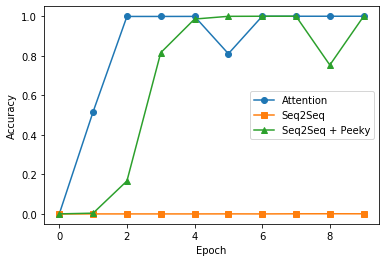

In [13]:
# 그래프 그리기
x = np.arange(len(acc_list))

plt.plot(x, acc_list, marker='o',label='Attention')
plt.plot(x, acc_list2, marker='s',label='Seq2Seq')
plt.plot(x, acc_list3, marker='^',label='Seq2Seq + Peeky')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(-0.05, 1.05)
plt.show()